In [238]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [239]:
diamonds_train = pd.read_csv('outputs/df_train.csv')
diamonds_train_price = pd.read_csv('outputs/df_train_price.csv')
diamonds_predict=pd.read_csv('outputs/df_test.csv')
submit=pd.read_csv('inputs/sample_submission.csv')

In [240]:
diamonds_train.head()

,carat,cut_numeric,color_numeric,clarity_numeric,depth,table,x,y,z
0,-1.051355,-0.810564,0.352161,-0.033632,0.736126,-0.650176,-1.283716,-1.236438,-1.180531
1,-0.966764,0.982588,0.940769,-0.641579,0.596363,-1.097476,-1.132102,-1.080061,-1.039596
2,-0.839879,-0.810564,1.529377,-0.641579,-1.010919,2.033618,-0.918059,-0.854183,-0.969129
3,-0.839879,0.086012,-0.825055,0.574315,0.037308,0.781181,-0.900222,-0.862870,-0.870475
4,0.217504,-0.810564,1.529377,-0.641579,-0.521746,2.480917,0.330526,0.344710,0.271096


In [241]:
diamonds_predict.head()

,carat,cut_numeric,color_numeric,clarity_numeric,depth,table,x,y,z
0,3.267015,0.978152,-1.416151,-1.232414,-0.666318,-1.554540,2.620734,2.539800,2.446736
1,2.596725,0.978152,-0.830504,-1.232414,0.168508,-0.658049,2.175567,2.234832,2.230593
2,-0.608098,0.978152,-1.416151,-0.627731,-0.040199,-1.554540,-0.495431,-0.491942,-0.492811
3,-1.047976,0.978152,-1.416151,-0.627731,-0.318474,-0.658049,-1.261117,-1.263332,-1.285335
4,0.334497,-2.592365,-0.830504,-0.023048,4.899190,-0.658049,0.332578,0.216660,0.890505


# Split train and test

In [242]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(diamonds_train, diamonds_train_price, test_size=0.01)

In [243]:
X_train.head()

,carat,cut_numeric,color_numeric,clarity_numeric,depth,table,x,y,z
39058,0.534718,0.086012,1.529377,-0.641579,-1.709736,0.244422,0.901308,0.822530,0.623433
32920,-1.009060,0.982588,0.940769,1.182263,0.177072,-1.544775,-1.176694,-1.132187,-1.124157
18136,-1.030207,0.982588,-0.825055,0.574315,-0.312101,-1.097476,-1.221286,-1.175625,-1.208718
23968,-0.924469,-0.810564,-0.236447,1.790210,0.736126,-0.202877,-1.078591,-1.027935,-0.969129
10328,0.428980,-0.810564,0.352161,-1.249527,0.107190,0.691721,0.589162,0.614026,0.609339


In [244]:
y_test.head()

,price
7743,595
38429,1021
38062,14904
27055,4540
39165,6352


# KNeighborsClassifier

In [245]:
from sklearn.neighbors import KNeighborsClassifier

In [246]:
knc = KNeighborsClassifier(n_neighbors=1, algorithm='brute', p=1)
knc.fit(X_train,y_train)
y_pred_kNeigh = knc.predict(X_test)

/home/must4in3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [247]:
y_test_kNeigh = y_test.copy()
y_test_kNeigh['y']= y_pred_kNeigh

In [248]:
y_test_kNeigh['Price-y'] = abs(y_test_kNeigh['price']- y_test_kNeigh['y'])
y_test_kNeigh.describe()

,price,y,Price-y
count,405.000000,405.000000,405.000000
mean,3928.822222,3893.822222,363.824691
std,4013.430468,3906.477351,613.758294
min,394.000000,394.000000,0.000000
25%,984.000000,966.000000,61.000000
50%,2574.000000,2485.000000,157.000000
75%,5269.000000,5364.000000,387.000000
max,18371.000000,18342.000000,4876.000000


In [249]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score

In [250]:
#print("Accuracy",round(accuracy_score(y_test, y_pred_kNeigh),3))
#print("Precision",round(precision_score(y_test,y_pred_kNeigh,average = 'weighted'),3))
#print("Recall",round(recall_score(y_test, y_pred_kNeigh, average = 'weighted'),3))
#print("F1Score",round(f1_score(y_test, y_pred_kNeigh, average = 'weighted'),3))
r2_score(y_test, y_pred_kNeigh)

0.9683755164198545

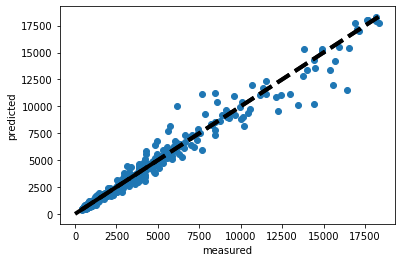

In [251]:
fig, ax = plt.subplots()
ax.scatter( y_test_kNeigh['price'], y_test_kNeigh['y'])
ax.plot([y_test_kNeigh.min(), y_test_kNeigh.max()], [y_test_kNeigh.min(), y_test_kNeigh.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()